In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from IPython.display import display, HTML
from collections import Counter
import drugLexicon
import calendar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from IPython.display import display, HTML

data = pd.read_pickle('Total_Data.pkl')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307163 entries, 0 to 178021
Data columns (total 32 columns):
approved_at_utc           0 non-null float64
author                    307163 non-null object
author_cakeday            457 non-null float64
author_flair_css_class    54671 non-null object
author_flair_text         56326 non-null object
banned_at_utc             0 non-null float64
body                      307163 non-null object
can_gild                  137570 non-null object
can_mod_post              14556 non-null object
collapsed                 44753 non-null object
collapsed_reason          359 non-null object
controversiality          307163 non-null int64
created_utc               307163 non-null int64
date                      307163 non-null datetime64[ns]
distinguished             930 non-null object
edited                    307163 non-null int64
gilded                    307163 non-null int64
id                        307163 non-null object
is_submitter           

,approved_at_utc,author,author_cakeday,author_flair_css_class,author_flair_text,banned_at_utc,body,can_gild,can_mod_post,collapsed,...,mod_reason_title,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,ups
0,NaN,revengeofthesmudge,NaN,None,None,NaN,"I just saw this article, obviously it's one of...",NaN,NaN,NaN,...,NaN,t3_3yyu5c,NaN,1454207947,7.0,False,opiates,t5_2r0y3,NaN,7.0
1,NaN,alwaysreadthename,NaN,california-sheet1-row05-col03-pacific-2sht7-2r...,California Golden Bears / Pacific Tigers,NaN,Wait was that codeine cough syrup??,NaN,NaN,NaN,...,NaN,t3_3yyo0t,NaN,1454208141,1.0,False,CFB,t5_2qm9d,NaN,1.0
2,NaN,TinSodder,NaN,None,None,NaN,I as much said the same thing to my heroin add...,NaN,NaN,NaN,...,NaN,t3_3yxdlh,NaN,1454208293,3.0,False,AdviceAnimals,t5_2s7tt,NaN,3.0
3,NaN,Symdj,NaN,None,None,NaN,I was on methadone for a decade and subs for 4...,NaN,NaN,NaN,...,NaN,t3_3yysmx,NaN,1454208365,2.0,False,OpiatesRecovery,t5_2tkk8,NaN,2.0
4,NaN,roionsteroids,NaN,None,None,NaN,Eh codeine is always rather mild and has a cei...,NaN,NaN,NaN,...,NaN,t1_cyhuthp,NaN,1454208538,2.0,False,Drugs,t5_2qh7l,NaN,2.0


In [30]:
data16 = data[np.array([date.year==2016 for date in data.date])]
data17 = data[np.array([date.year==2017 for date in data.date])]
data16.info()
data17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129141 entries, 0 to 129140
Data columns (total 32 columns):
approved_at_utc           0 non-null float64
author                    129141 non-null object
author_cakeday            0 non-null float64
author_flair_css_class    23992 non-null object
author_flair_text         24517 non-null object
banned_at_utc             0 non-null float64
body                      129141 non-null object
can_gild                  0 non-null object
can_mod_post              0 non-null object
collapsed                 0 non-null object
collapsed_reason          0 non-null object
controversiality          129141 non-null int64
created_utc               129141 non-null int64
date                      129141 non-null datetime64[ns]
distinguished             364 non-null object
edited                    129141 non-null int64
gilded                    129141 non-null int64
id                        129141 non-null object
is_submitter              0 non-null obj

In [33]:
np.savetxt('2016_authors.txt', np.unique(data16.author), fmt='%s')
np.savetxt('2017_authors.txt', np.unique(data17.author), fmt='%s')

In [34]:
np.savetxt('2016_subreddits.txt', np.unique(data16.subreddit), fmt='%s')
np.savetxt('2017_subreddits.txt', np.unique(data17.subreddit), fmt='%s')

In [8]:
from collections import Counter
author_counts = pd.DataFrame(list(Counter(data.author).items()), columns=['author', 'count']).sort_values('count', ascending=False)
author_counts.info()
author_counts.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120113 entries, 45426 to 120112
Data columns (total 2 columns):
author    120113 non-null object
count     120113 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


,author,count
45426,[deleted],4720
64555,GroovyEFS,736
11398,spinderella69,614
51131,orangesunshine,598
81188,AutoModerator,586


In [17]:
np.sum(author_counts['count']==1), np.sum(author_counts['count']>1), np.sum(author_counts['count']>2), np.sum(author_counts['count']>10), np.sum(author_counts['count']>100)

(81946, 38167, 20462, 3618, 137)

In [9]:
subreddit_counts = pd.DataFrame(list(Counter(data.subreddit).items()),
                                columns=['subreddit', 'count']).sort_values('count', ascending=False)
subreddit_counts.info()
subreddit_counts.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5866 entries, 4529 to 5865
Data columns (total 2 columns):
subreddit    5866 non-null object
count        5866 non-null int64
dtypes: int64(1), object(1)
memory usage: 137.5+ KB


,subreddit,count
4529,opiates,66066
1522,Drugs,27837
2648,AskReddit,22792
1717,DarkNetMarkets,9601
5797,news,8971


In [10]:
np.sum(subreddit_counts['count']>100), np.sum(subreddit_counts['count']>1000), np.sum(subreddit_counts['count']>5000)

(257, 36, 6)

In [11]:
author_subreddit_counts = data[data.author!='[deleted]'][['author', 'subreddit', 'date']].groupby(
    ['author', 'subreddit']).count()
author_subreddit_counts.columns = ['count']
author_subreddit_counts.sort_values('count', ascending=False, inplace=True)
author_subreddit_counts.info()
print(np.sum(author_subreddit_counts['count']==1), np.sum(author_subreddit_counts['count']>1),
      np.sum(author_subreddit_counts['count']>=10), np.sum(author_subreddit_counts['count']>=100))
author_subreddit_counts.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 158826 entries, (spinderella69, opiates) to (zzzzzzzvv, Drugs)
Data columns (total 1 columns):
count    158826 non-null int64
dtypes: int64(1)
memory usage: 3.1+ MB
122362 36464 2983 83


,,count
author,subreddit,
spinderella69,opiates,590
orangesunshine,opiates,563
kaif_veenis,opiates,463
AutoModerator,Drugs,448
gangsta232,opiates,389


In [12]:
tmp = author_subreddit_counts.reset_index()
tmp = tmp[['author', 'subreddit']].groupby('author').count()
tmp.sort_values('subreddit', ascending=False, inplace=True)
tmp.head()

,subreddit
author,
autotldr,94
WikiTextBot,59
Mentioned_Videos,43
poiu477,38
Servalpur,28


In [21]:
len(set(data.subreddit)), len(set(data[data.author!='[deleted]'].author))

(5866, 120112)

In [16]:
np.sum(tmp.subreddit>=10), np.sum(tmp.subreddit>=15), np.sum(tmp.subreddit>=20)

(256, 67, 25)

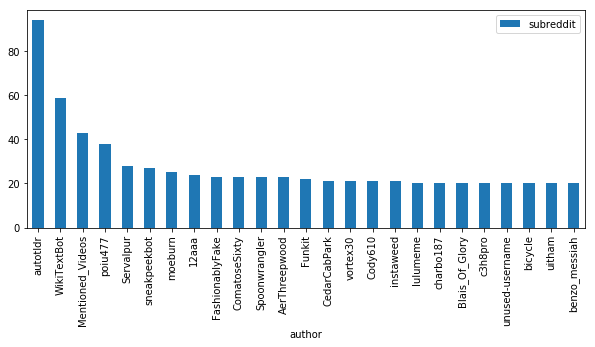

In [17]:
tmp[tmp.subreddit>=20].plot(kind='bar', figsize=(10, 4))

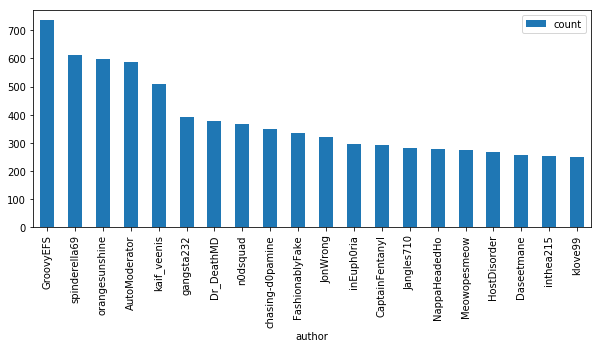

In [26]:
t = author_counts.set_index('author')
t[np.logical_and(t['count']<1000,
                             t['count']>=250)].plot(kind='bar', figsize=(10, 4))

In [15]:
data[data.author=='AutoModerator'][['author', 'date', 'subreddit', 'body']]

,author,date,subreddit,body
1031,AutoModerator,2016-01-04 07:56:35,Drugs,"Hello /u/spacequeenog, [**""lean"" or ""purple dr..."
1291,AutoModerator,2016-01-05 08:55:25,Drugs,"Hello /u/speedfleek, [**""lean"" or ""purple dran..."
1383,AutoModerator,2016-01-05 18:07:54,Drugs,"Hello /u/Kotton_Mouth, [**""lean"" or ""purple dr..."
2639,AutoModerator,2016-01-10 15:08:48,Drugs,"Hello /u/rozularen, [**""lean"" or ""purple drank..."
3050,AutoModerator,2016-01-11 23:22:28,Drugs,"Hello /u/slashrslashd, [**""lean"" or ""purple dr..."
3527,AutoModerator,2016-01-13 18:29:08,Drugs,"Hello /u/HASHSLINGINGSCHLAGER, [**""lean"" or ""p..."
3577,AutoModerator,2016-01-13 22:44:30,Drugs,"Hello /u/waste_yute, [**""lean"" or ""purple dran..."
3618,AutoModerator,2016-01-14 01:59:10,researchchemicals,"Hello /u/McDain, opiates are alkaloids found i..."
3858,AutoModerator,2016-01-14 22:30:55,Drugs,"Hello /u/throw3576, [**""lean"" or ""purple drank..."
4640,AutoModerator,2016-01-17 03:20:13,Drugs,"Hello /u/virtueriley, [**""lean"" or ""purple dra..."


In [2]:
import drugLexicon
dl = drugLexicon.DrugLexicon().lex
print(dl)

{'oxymorphone': {'oxymorphone'}, 'morphine': {'morphine', 'emsel', 'morf', 'morpho'}, 'fentanyl': {'fent', 'fentanyl', 'murder 8'}, 'codeine': {'codeine', 'slizzurp', 'captain cody'}, 'hydrocodone': {'narco', 'hydrocodone', 'vickies', 'norco', 'watson-387'}, 'methadone': {'fizzies', 'amidone', 'methadone'}, 'hydromorphone': {'dillies', 'hydromorphone'}, 'oxycodone': {'oxy', 'oxycet', 'percs', 'oxycodone', 'oxycotton'}, 'meperidine': {'demmies', 'meperidine'}}


In [3]:
drug_category_map = {}
drug_category_map['oxycodone'] = 'Semi-Synthetic'
drug_category_map['hydrocodone'] = 'Semi-Synthetic'
drug_category_map['methadone'] = 'Fully-Synthetic'
drug_category_map['meperidine'] = 'Fully-Synthetic'
drug_category_map['codeine'] = 'Natural'
drug_category_map['fentanyl'] = 'Fully-Synthetic'
drug_category_map['hydromorphone'] = 'Semi-Synthetic'
drug_category_map['oxymorphone'] = 'Semi-Synthetic'
drug_category_map['morphine'] = 'Natural'

list(zip([[drug_category_map[drug], drug, vals] for drug, vals in dl.items()]))

[(['Semi-Synthetic', 'oxymorphone', {'oxymorphone'}],),
 (['Natural', 'morphine', {'emsel', 'morf', 'morphine', 'morpho'}],),
 (['Fully-Synthetic', 'fentanyl', {'fent', 'fentanyl', 'murder 8'}],),
 (['Natural', 'codeine', {'captain cody', 'codeine', 'slizzurp'}],),
 (['Semi-Synthetic',
   'hydrocodone',
   {'hydrocodone', 'narco', 'norco', 'vickies', 'watson-387'}],),
 (['Fully-Synthetic', 'methadone', {'amidone', 'fizzies', 'methadone'}],),
 (['Semi-Synthetic', 'hydromorphone', {'dillies', 'hydromorphone'}],),
 (['Semi-Synthetic',
   'oxycodone',
   {'oxy', 'oxycet', 'oxycodone', 'oxycotton', 'percs'}],),
 (['Fully-Synthetic', 'meperidine', {'demmies', 'meperidine'}],)]

In [4]:
drugs = list(dl.keys())
print(drugs)
drugs = np.sort(drugs)
drugs

['oxymorphone', 'morphine', 'fentanyl', 'codeine', 'hydrocodone', 'methadone', 'hydromorphone', 'oxycodone', 'meperidine']


array(['codeine', 'fentanyl', 'hydrocodone', 'hydromorphone',
       'meperidine', 'methadone', 'morphine', 'oxycodone', 'oxymorphone'],
      dtype='<U13')

In [20]:
bodyl = list(data.body[0])[1].lower().split()
print()
category = np.array([False for drug in drugs])
for word in bodyl:
    for idx, drug in enumerate(drugs):
        if word.lower() in dl[drug]:
            category[idx] = True
print(category)            


[False False False False False False False  True False]


In [18]:
list(data.body[0])[0]

'I just saw this article, obviously it\'s one of those "in 10 years maybe" type of things that often fails to materialize at all, but just the thought of it got me excited.  Even if it was prohibitively expensive, just a bunch of these existing out there seems like it would be a huge boon for the illicit pharmaceutical market.  Being able to print diamorphine and fentanyl is as good as being able to print money, no way all those machines could be kept locked up tight enough to escape the inevitable temptation.  The authorities will try their damndest to crack down but we know how that goes, the failed war on drugs will turn into the failed war on drug printing.  Fun to think about. '

In [44]:
data.reset_index(drop=True, inplace=True)
data.to_pickle('Total_Data_idx.pkl')

In [5]:
data = pd.read_pickle('Total_Data_idx.pkl')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307163 entries, 0 to 307162
Data columns (total 32 columns):
approved_at_utc           0 non-null float64
author                    307163 non-null object
author_cakeday            457 non-null float64
author_flair_css_class    54671 non-null object
author_flair_text         56326 non-null object
banned_at_utc             0 non-null float64
body                      307163 non-null object
can_gild                  137570 non-null object
can_mod_post              14556 non-null object
collapsed                 44753 non-null object
collapsed_reason          359 non-null object
controversiality          307163 non-null int64
created_utc               307163 non-null int64
date                      307163 non-null datetime64[ns]
distinguished             930 non-null object
edited                    307163 non-null int64
gilded                    307163 non-null int64
id                        307163 non-null object
is_submitter           

,approved_at_utc,author,author_cakeday,author_flair_css_class,author_flair_text,banned_at_utc,body,can_gild,can_mod_post,collapsed,...,mod_reason_title,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,ups
0,NaN,revengeofthesmudge,NaN,None,None,NaN,"I just saw this article, obviously it's one of...",NaN,NaN,NaN,...,NaN,t3_3yyu5c,NaN,1454207947,7.0,False,opiates,t5_2r0y3,NaN,7.0
1,NaN,alwaysreadthename,NaN,california-sheet1-row05-col03-pacific-2sht7-2r...,California Golden Bears / Pacific Tigers,NaN,Wait was that codeine cough syrup??,NaN,NaN,NaN,...,NaN,t3_3yyo0t,NaN,1454208141,1.0,False,CFB,t5_2qm9d,NaN,1.0
2,NaN,TinSodder,NaN,None,None,NaN,I as much said the same thing to my heroin add...,NaN,NaN,NaN,...,NaN,t3_3yxdlh,NaN,1454208293,3.0,False,AdviceAnimals,t5_2s7tt,NaN,3.0
3,NaN,Symdj,NaN,None,None,NaN,I was on methadone for a decade and subs for 4...,NaN,NaN,NaN,...,NaN,t3_3yysmx,NaN,1454208365,2.0,False,OpiatesRecovery,t5_2tkk8,NaN,2.0
4,NaN,roionsteroids,NaN,None,None,NaN,Eh codeine is always rather mild and has a cei...,NaN,NaN,NaN,...,NaN,t1_cyhuthp,NaN,1454208538,2.0,False,Drugs,t5_2qh7l,NaN,2.0


In [45]:
subdata = data[['body', 'date']]
categories = []
for row in range(data.shape[0]):
    try:
        bodyl = data.body[row].lower().split()
        category = np.array([False for drug in drugs])
        for word in bodyl:
            for idx, drug in enumerate(drugs):
                if word.lower() in dl[drug]:
                    category[idx] = True
        categories.append(category)
    except Exception as e:
        print(row, e, sep='\n')
        categories.append([[] for drug in drugs])
    if(row%5000==0):
        print(row)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000


In [46]:
data_categorywise = pd.concat([subdata, pd.DataFrame(categories, columns=drugs)], axis=1)
data_categorywise.to_pickle('Total_Data_Categorywise.pkl')
data_categorywise.info()
data_categorywise.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307163 entries, 0 to 307162
Data columns (total 11 columns):
body             307163 non-null object
date             307163 non-null datetime64[ns]
codeine          307163 non-null bool
fentanyl         307163 non-null bool
hydrocodone      307163 non-null bool
hydromorphone    307163 non-null bool
meperidine       307163 non-null bool
methadone        307163 non-null bool
morphine         307163 non-null bool
oxycodone        307163 non-null bool
oxymorphone      307163 non-null bool
dtypes: bool(9), datetime64[ns](1), object(1)
memory usage: 7.3+ MB


,body,date,codeine,fentanyl,hydrocodone,hydromorphone,meperidine,methadone,morphine,oxycodone,oxymorphone
0,"I just saw this article, obviously it's one of...",2016-01-01 00:00:25,False,True,False,False,False,False,False,False,False
1,Wait was that codeine cough syrup??,2016-01-01 00:13:29,True,False,False,False,False,False,False,False,False
2,I as much said the same thing to my heroin add...,2016-01-01 00:23:28,False,False,False,False,False,True,False,False,False
3,I was on methadone for a decade and subs for 4...,2016-01-01 00:28:04,False,False,False,False,False,True,False,False,False
4,Eh codeine is always rather mild and has a cei...,2016-01-01 00:39:35,True,False,False,False,False,False,False,False,False


In [47]:
data_categorywise['Month'] = [date.month for date in data_categorywise.date]
data_categorywise['Year'] = [date.year for date in data_categorywise.date]
data_categorywise.to_pickle('Total_Data_Categorywise.pkl')
data_categorywise.info()
data_categorywise.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307163 entries, 0 to 307162
Data columns (total 13 columns):
body             307163 non-null object
date             307163 non-null datetime64[ns]
codeine          307163 non-null bool
fentanyl         307163 non-null bool
hydrocodone      307163 non-null bool
hydromorphone    307163 non-null bool
meperidine       307163 non-null bool
methadone        307163 non-null bool
morphine         307163 non-null bool
oxycodone        307163 non-null bool
oxymorphone      307163 non-null bool
Month            307163 non-null int64
Year             307163 non-null int64
dtypes: bool(9), datetime64[ns](1), int64(2), object(1)
memory usage: 12.0+ MB


,body,date,codeine,fentanyl,hydrocodone,hydromorphone,meperidine,methadone,morphine,oxycodone,oxymorphone,Month,Year
0,"I just saw this article, obviously it's one of...",2016-01-01 00:00:25,False,True,False,False,False,False,False,False,False,1,2016
1,Wait was that codeine cough syrup??,2016-01-01 00:13:29,True,False,False,False,False,False,False,False,False,1,2016
2,I as much said the same thing to my heroin add...,2016-01-01 00:23:28,False,False,False,False,False,True,False,False,False,1,2016
3,I was on methadone for a decade and subs for 4...,2016-01-01 00:28:04,False,False,False,False,False,True,False,False,False,1,2016
4,Eh codeine is always rather mild and has a cei...,2016-01-01 00:39:35,True,False,False,False,False,False,False,False,False,1,2016


In [6]:
data_categorywise = pd.read_pickle('Total_Data_Categorywise.pkl')
data_categorywise.info()
data_categorywise.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307163 entries, 0 to 307162
Data columns (total 13 columns):
body             307163 non-null object
date             307163 non-null datetime64[ns]
codeine          307163 non-null bool
fentanyl         307163 non-null bool
hydrocodone      307163 non-null bool
hydromorphone    307163 non-null bool
meperidine       307163 non-null bool
methadone        307163 non-null bool
morphine         307163 non-null bool
oxycodone        307163 non-null bool
oxymorphone      307163 non-null bool
Month            307163 non-null int64
Year             307163 non-null int64
dtypes: bool(9), datetime64[ns](1), int64(2), object(1)
memory usage: 12.0+ MB


,body,date,codeine,fentanyl,hydrocodone,hydromorphone,meperidine,methadone,morphine,oxycodone,oxymorphone,Month,Year
0,"I just saw this article, obviously it's one of...",2016-01-01 00:00:25,False,True,False,False,False,False,False,False,False,1,2016
1,Wait was that codeine cough syrup??,2016-01-01 00:13:29,True,False,False,False,False,False,False,False,False,1,2016
2,I as much said the same thing to my heroin add...,2016-01-01 00:23:28,False,False,False,False,False,True,False,False,False,1,2016
3,I was on methadone for a decade and subs for 4...,2016-01-01 00:28:04,False,False,False,False,False,True,False,False,False,1,2016
4,Eh codeine is always rather mild and has a cei...,2016-01-01 00:39:35,True,False,False,False,False,False,False,False,False,1,2016


In [35]:
data_categorywise[data_categorywise.columns[2:]].groupby(['Year']).sum()

,codeine,fentanyl,hydrocodone,hydromorphone,meperidine,methadone,morphine,oxycodone,oxymorphone,Month
Year,,,,,,,,,,
2016,14529.0,30549.0,14139.0,1936.0,89.0,15780.0,27015.0,34447.0,1020.0,891363
2017,18630.0,55385.0,17356.0,2122.0,111.0,21466.0,31170.0,44555.0,1204.0,1205731


In [48]:
data_counts = data_categorywise[data_categorywise.columns[2:]].groupby(['Month', 'Year']).sum()
data_counts.reset_index(inplace=True)
data_counts.to_pickle('data_counts.pkl')
data_counts

,Month,Year,codeine,fentanyl,hydrocodone,hydromorphone,meperidine,methadone,morphine,oxycodone,oxymorphone
0,1,2016,1283.0,1216.0,1152.0,155.0,5.0,1240.0,2160.0,2748.0,92.0
1,1,2017,1638.0,3379.0,1310.0,177.0,8.0,1917.0,2421.0,3391.0,79.0
2,2,2016,1095.0,1631.0,1175.0,130.0,12.0,1077.0,2281.0,2720.0,87.0
3,2,2017,1358.0,3754.0,1181.0,140.0,15.0,1244.0,2159.0,3434.0,88.0
4,3,2016,1054.0,1588.0,1576.0,142.0,4.0,1403.0,2617.0,2704.0,91.0
5,3,2017,1520.0,4423.0,1611.0,165.0,11.0,1558.0,2695.0,3919.0,97.0
6,4,2016,1020.0,1861.0,1099.0,123.0,7.0,1187.0,1999.0,2421.0,69.0
7,4,2017,1395.0,3978.0,1909.0,190.0,6.0,1464.0,2454.0,3570.0,86.0
8,5,2016,1283.0,1805.0,1139.0,171.0,5.0,1305.0,2234.0,2848.0,58.0
9,5,2017,1495.0,4894.0,1748.0,133.0,14.0,1681.0,2196.0,3557.0,67.0


In [7]:
data_counts = pd.read_pickle('data_counts.pkl')
data_counts

,Month,Year,codeine,fentanyl,hydrocodone,hydromorphone,meperidine,methadone,morphine,oxycodone,oxymorphone
0,1,2016,1283.0,1216.0,1152.0,155.0,5.0,1240.0,2160.0,2748.0,92.0
1,1,2017,1638.0,3379.0,1310.0,177.0,8.0,1917.0,2421.0,3391.0,79.0
2,2,2016,1095.0,1631.0,1175.0,130.0,12.0,1077.0,2281.0,2720.0,87.0
3,2,2017,1358.0,3754.0,1181.0,140.0,15.0,1244.0,2159.0,3434.0,88.0
4,3,2016,1054.0,1588.0,1576.0,142.0,4.0,1403.0,2617.0,2704.0,91.0
5,3,2017,1520.0,4423.0,1611.0,165.0,11.0,1558.0,2695.0,3919.0,97.0
6,4,2016,1020.0,1861.0,1099.0,123.0,7.0,1187.0,1999.0,2421.0,69.0
7,4,2017,1395.0,3978.0,1909.0,190.0,6.0,1464.0,2454.0,3570.0,86.0
8,5,2016,1283.0,1805.0,1139.0,171.0,5.0,1305.0,2234.0,2848.0,58.0
9,5,2017,1495.0,4894.0,1748.0,133.0,14.0,1681.0,2196.0,3557.0,67.0


In [59]:
data_counts[np.logical_and(data_counts.Year==2016, data_counts.Month==1)]

,Month,Year,codeine,fentanyl,hydrocodone,hydromorphone,meperidine,methadone,morphine,oxycodone,oxymorphone
0,1,2016,1283.0,1216.0,1152.0,155.0,5.0,1240.0,2160.0,2748.0,92.0


In [61]:
data_counts[data_counts.Year==2016]

,Month,Year,codeine,fentanyl,hydrocodone,hydromorphone,meperidine,methadone,morphine,oxycodone,oxymorphone
0,1,2016,1283.0,1216.0,1152.0,155.0,5.0,1240.0,2160.0,2748.0,92.0
2,2,2016,1095.0,1631.0,1175.0,130.0,12.0,1077.0,2281.0,2720.0,87.0
4,3,2016,1054.0,1588.0,1576.0,142.0,4.0,1403.0,2617.0,2704.0,91.0
6,4,2016,1020.0,1861.0,1099.0,123.0,7.0,1187.0,1999.0,2421.0,69.0
8,5,2016,1283.0,1805.0,1139.0,171.0,5.0,1305.0,2234.0,2848.0,58.0
10,6,2016,1076.0,2337.0,1057.0,151.0,8.0,1133.0,1994.0,2580.0,93.0
12,7,2016,1120.0,1822.0,1052.0,133.0,5.0,1109.0,1937.0,2623.0,105.0
14,8,2016,1252.0,2797.0,1177.0,161.0,14.0,1372.0,2513.0,2987.0,87.0
16,9,2016,1342.0,4609.0,1312.0,211.0,3.0,1671.0,2645.0,3224.0,100.0
18,10,2016,1277.0,3262.0,1121.0,195.0,5.0,1485.0,2041.0,3260.0,86.0


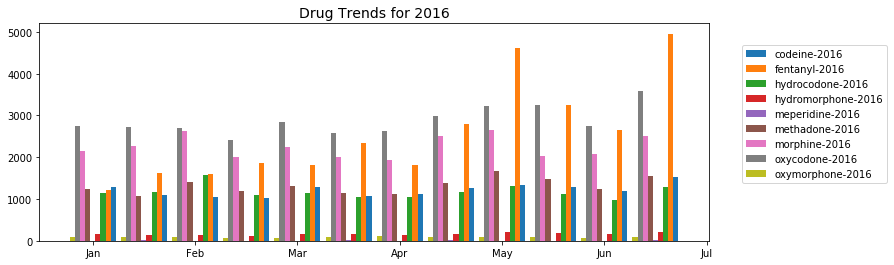

In [98]:
import calendar
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
x = np.arange(12)
width = 0.1
year = 2016
for idx, pos in enumerate(range(-4, 5)):
        ax.bar(x-(width*pos), data_counts[data_counts.Year==year][drugs[idx]],
               width=width, align='center', label='{}-{}'.format(drugs[idx], year))
ax.set_xticklabels([calendar.month_abbr[month] for month in x], )
# ax.autoscale(tight=True)
plt.legend(bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.)
plt.title('Drug Trends for {}'.format(year), fontsize=14)
plt.show()

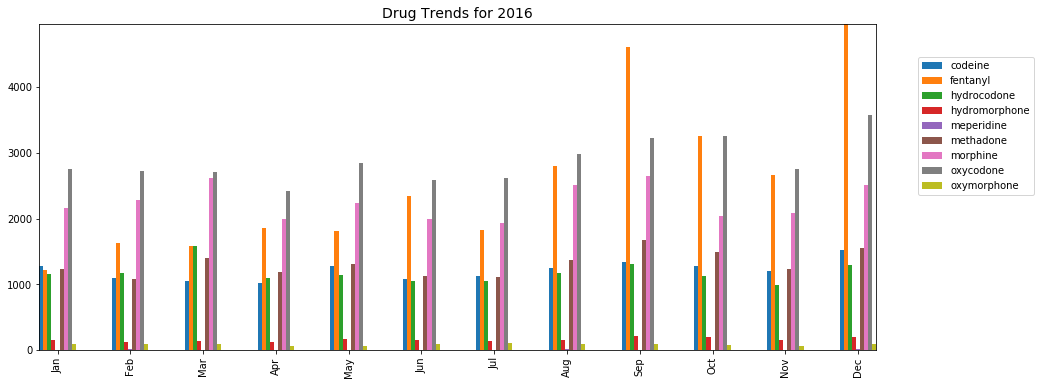

In [109]:
import calendar
year = 2016
ax = data_counts[data_counts.Year==year][data_counts.columns[2:]].plot(kind='bar', figsize=(15, 6))
ax.set_xticklabels([calendar.month_abbr[month+1] for month in x])
ax.autoscale(tight=True)
plt.legend(bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.)
plt.title('Drug Trends for {}'.format(year), fontsize=14)
plt.show()

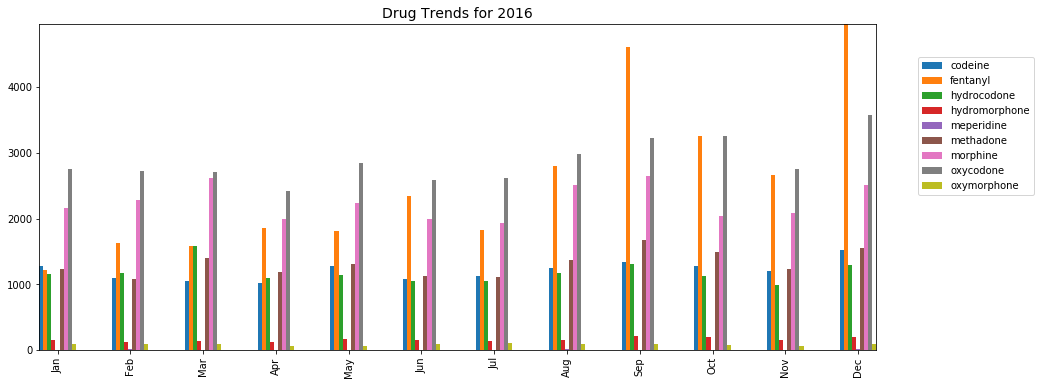

In [9]:
import calendar
year = 2016
x = np.arange(12)
ax = data_counts[data_counts.Year==year][data_counts.columns[2:]].plot(kind='bar', figsize=(15, 6))
ax.set_xticklabels([calendar.month_abbr[month+1] for month in x])
ax.autoscale(tight=True)
plt.legend(bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.)
plt.title('Drug Trends for {}'.format(year), fontsize=14)
plt.show()

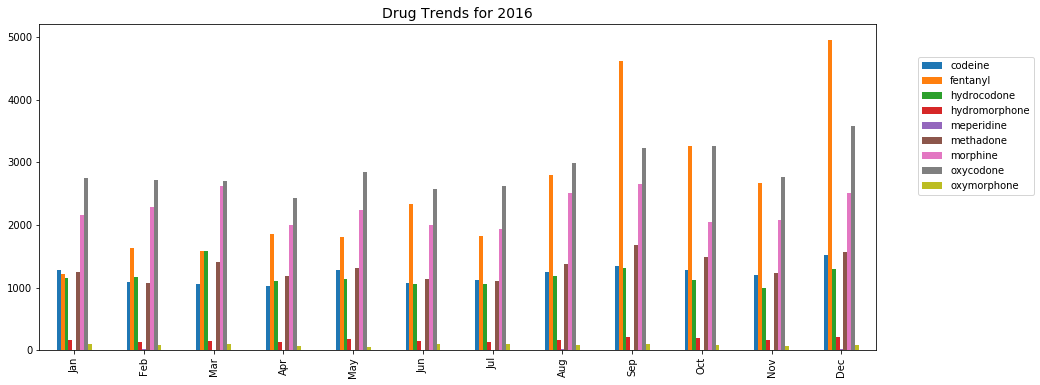

In [110]:
year = 2016
ax = data_counts[data_counts.Year==year][data_counts.columns[2:]].plot(kind='bar', figsize=(15, 6))
ax.set_xticklabels([calendar.month_abbr[month+1] for month in x])
# ax.autoscale(tight=True)
plt.legend(bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.)
plt.title('Drug Trends for {}'.format(year), fontsize=14)
plt.show()

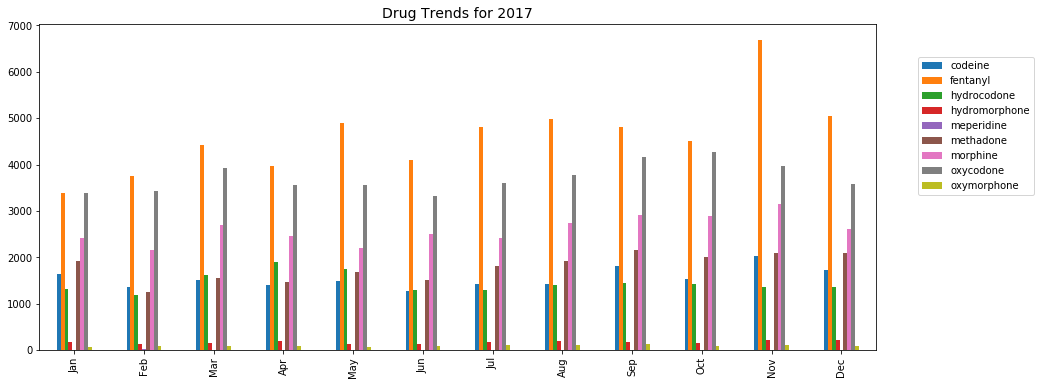

In [111]:
year = 2017
ax = data_counts[data_counts.Year==year][data_counts.columns[2:]].plot(kind='bar', figsize=(15, 6))
ax.set_xticklabels([calendar.month_abbr[month+1] for month in x])
# ax.autoscale(tight=True)
plt.legend(bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.)
plt.title('Drug Trends for {}'.format(year), fontsize=14)
plt.show()

In [115]:
list(zip([(drug, drug_category_map[drug]) for drug in drugs]))

[(('codeine', 'Natural'),),
 (('fentanyl', 'Fully-Synthetic'),),
 (('hydrocodone', 'Semi-Synthetic'),),
 (('hydromorphone', 'Semi-Synthetic'),),
 (('meperidine', 'Fully-Synthetic'),),
 (('methadone', 'Fully-Synthetic'),),
 (('morphine', 'Natural'),),
 (('oxycodone', 'Semi-Synthetic'),),
 (('oxymorphone', 'Semi-Synthetic'),)]

In [121]:
data_agg_counts = data_counts[data_counts.columns[:2]]
data_agg_counts['Natural'] = list(data_counts[drugs[0]] + data_counts[drugs[6]])
data_agg_counts['Semi-Synthetic'] = list(data_counts[drugs[2]] + data_counts[drugs[3]]+
                                         data_counts[drugs[7]] + data_counts[drugs[8]])
data_agg_counts['Fully-Synthetic'] = list(data_counts[drugs[1]] + data_counts[drugs[4]] + data_counts[drugs[5]])
data_agg_counts.to_pickle('data_agg_counts.pkl')
data_agg_counts

/cbcb/project2-scratch/kiran/modules/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/cbcb/project2-scratch/kiran/modules/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/cbcb/project2-scratch/kiran/modules/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Month,Year,Natural,Semi-Synthetic,Fully-Synthetic
0,1,2016,3443.0,4147.0,2461.0
1,1,2017,4059.0,4957.0,5304.0
2,2,2016,3376.0,4112.0,2720.0
3,2,2017,3517.0,4843.0,5013.0
4,3,2016,3671.0,4513.0,2995.0
5,3,2017,4215.0,5792.0,5992.0
6,4,2016,3019.0,3712.0,3055.0
7,4,2017,3849.0,5755.0,5448.0
8,5,2016,3517.0,4216.0,3115.0
9,5,2017,3691.0,5505.0,6589.0


In [10]:
data_agg_counts = pd.read_pickle('data_agg_counts.pkl')
data_agg_counts

,Month,Year,Natural,Semi-Synthetic,Fully-Synthetic
0,1,2016,3443.0,4147.0,2461.0
1,1,2017,4059.0,4957.0,5304.0
2,2,2016,3376.0,4112.0,2720.0
3,2,2017,3517.0,4843.0,5013.0
4,3,2016,3671.0,4513.0,2995.0
5,3,2017,4215.0,5792.0,5992.0
6,4,2016,3019.0,3712.0,3055.0
7,4,2017,3849.0,5755.0,5448.0
8,5,2016,3517.0,4216.0,3115.0
9,5,2017,3691.0,5505.0,6589.0


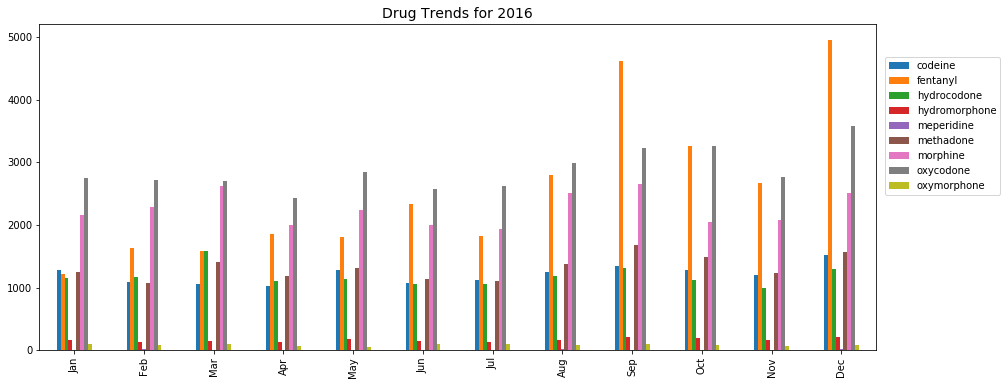

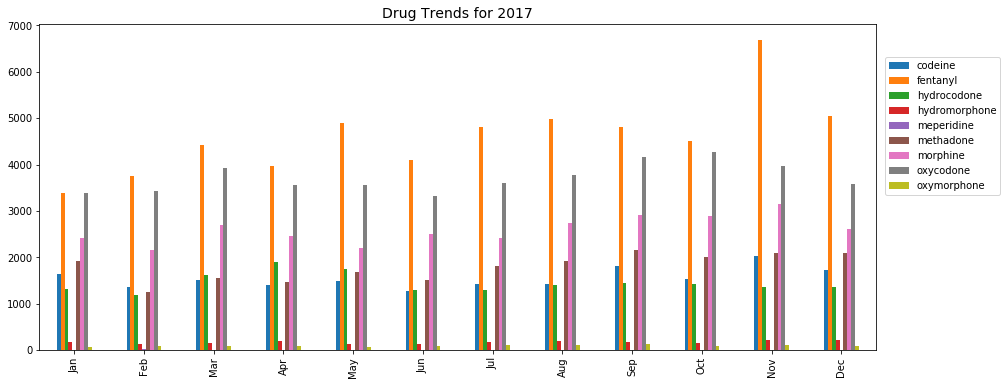

In [127]:
for year in range(2016, 2018):
    ax = data_counts[data_counts.Year==year][data_counts.columns[2:]].plot(kind='bar', figsize=(15, 6))
    ax.set_xticklabels([calendar.month_abbr[month+1] for month in x])
    # ax.autoscale(tight=True)
    plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2, borderaxespad=0.)
    plt.title('Drug Trends for {}'.format(year), fontsize=14)
    plt.show()
    plt.clf()

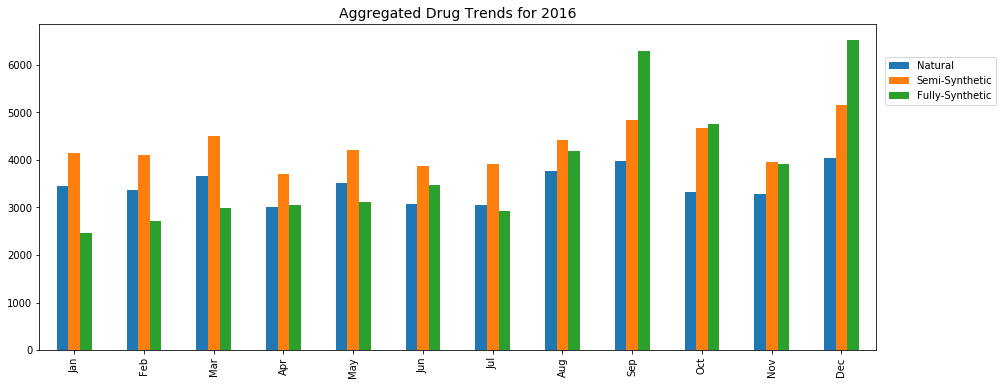

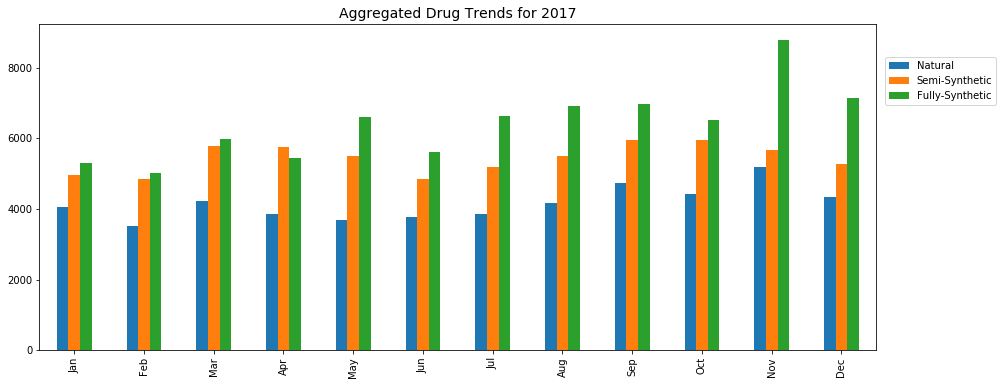

In [129]:
for year in range(2016, 2018):
    ax = data_agg_counts[data_agg_counts.Year==year][data_agg_counts.columns[2:]].plot(kind='bar', figsize=(15, 6))
    ax.set_xticklabels([calendar.month_abbr[month+1] for month in x])
    # ax.autoscale(tight=True)
    plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2, borderaxespad=0.)
    plt.title('Aggregated Drug Trends for {}'.format(year), fontsize=14)
    plt.show()
    plt.clf()